In [1]:
#Install missingno

!pip install missingno

In [2]:
# Import Libraries

import pandas as pd # Data preparation
import matplotlib.pyplot as plt   #Data Visualization
import seaborn as sns  
import missingno as msno  # Missing Data Visualization
from collections import Counter # Counting

In [3]:
# Load the dataset

df = pd.read_csv("Dune Sales Data.csv")

In [4]:
# Print the top rows

df.head()    # Gives top 5 rows by default

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67


In [5]:
# Print bottom rows

df.tail()  #Gives last 5 rows by default

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34862,7-Feb-16,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,2.0,1160.0,985.50
34863,13-Mar-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2049.0,1583.00
34864,5-Apr-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.0,560.67
34865,30-Aug-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2320.0,1568.00
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Dimensionality of the data - The number of rows and columns

df.shape

(34867, 12)

In [7]:
# Examine the columns/ features of the data

df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [8]:
# Investigate the dataset for anomalies and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


In [9]:
# Numerical Statistical Analysis

df.describe()

,Customer_Age,Quantity,Unit_Cost,Unit_Price
count,34867.000000,34866.000000,34866.000000,34866.000000
mean,36.382683,2.002524,349.880567,389.232473
std,11.112813,0.813936,490.015846,525.319097
min,17.000000,1.000000,0.670000,0.670000
25%,28.000000,1.000000,45.000000,53.670000
50%,35.000000,2.000000,150.000000,179.000000
75%,44.000000,3.000000,455.000000,521.000000
max,87.000000,3.000000,3240.000000,5082.000000


In [10]:
# Categorical Statistical Analysis

df.describe(include=["object","bool"])

,Date,Customer,Sales Person,Customer_Gender,State,Product_Category,Sub_Category,Payment Option
count,34866,34866,34866,34866,34866,34866,34866,34866
unique,576,4,7,2,36,3,17,3
top,1-Mar-16,Low,Remota,F,Lagos,Accessories,Keyboard,Cash
freq,196,13041,6667,17439,10332,22534,11112,15911


In [11]:
# Investigate the missing data

null_vals = df.isnull().sum()

null_vals

Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

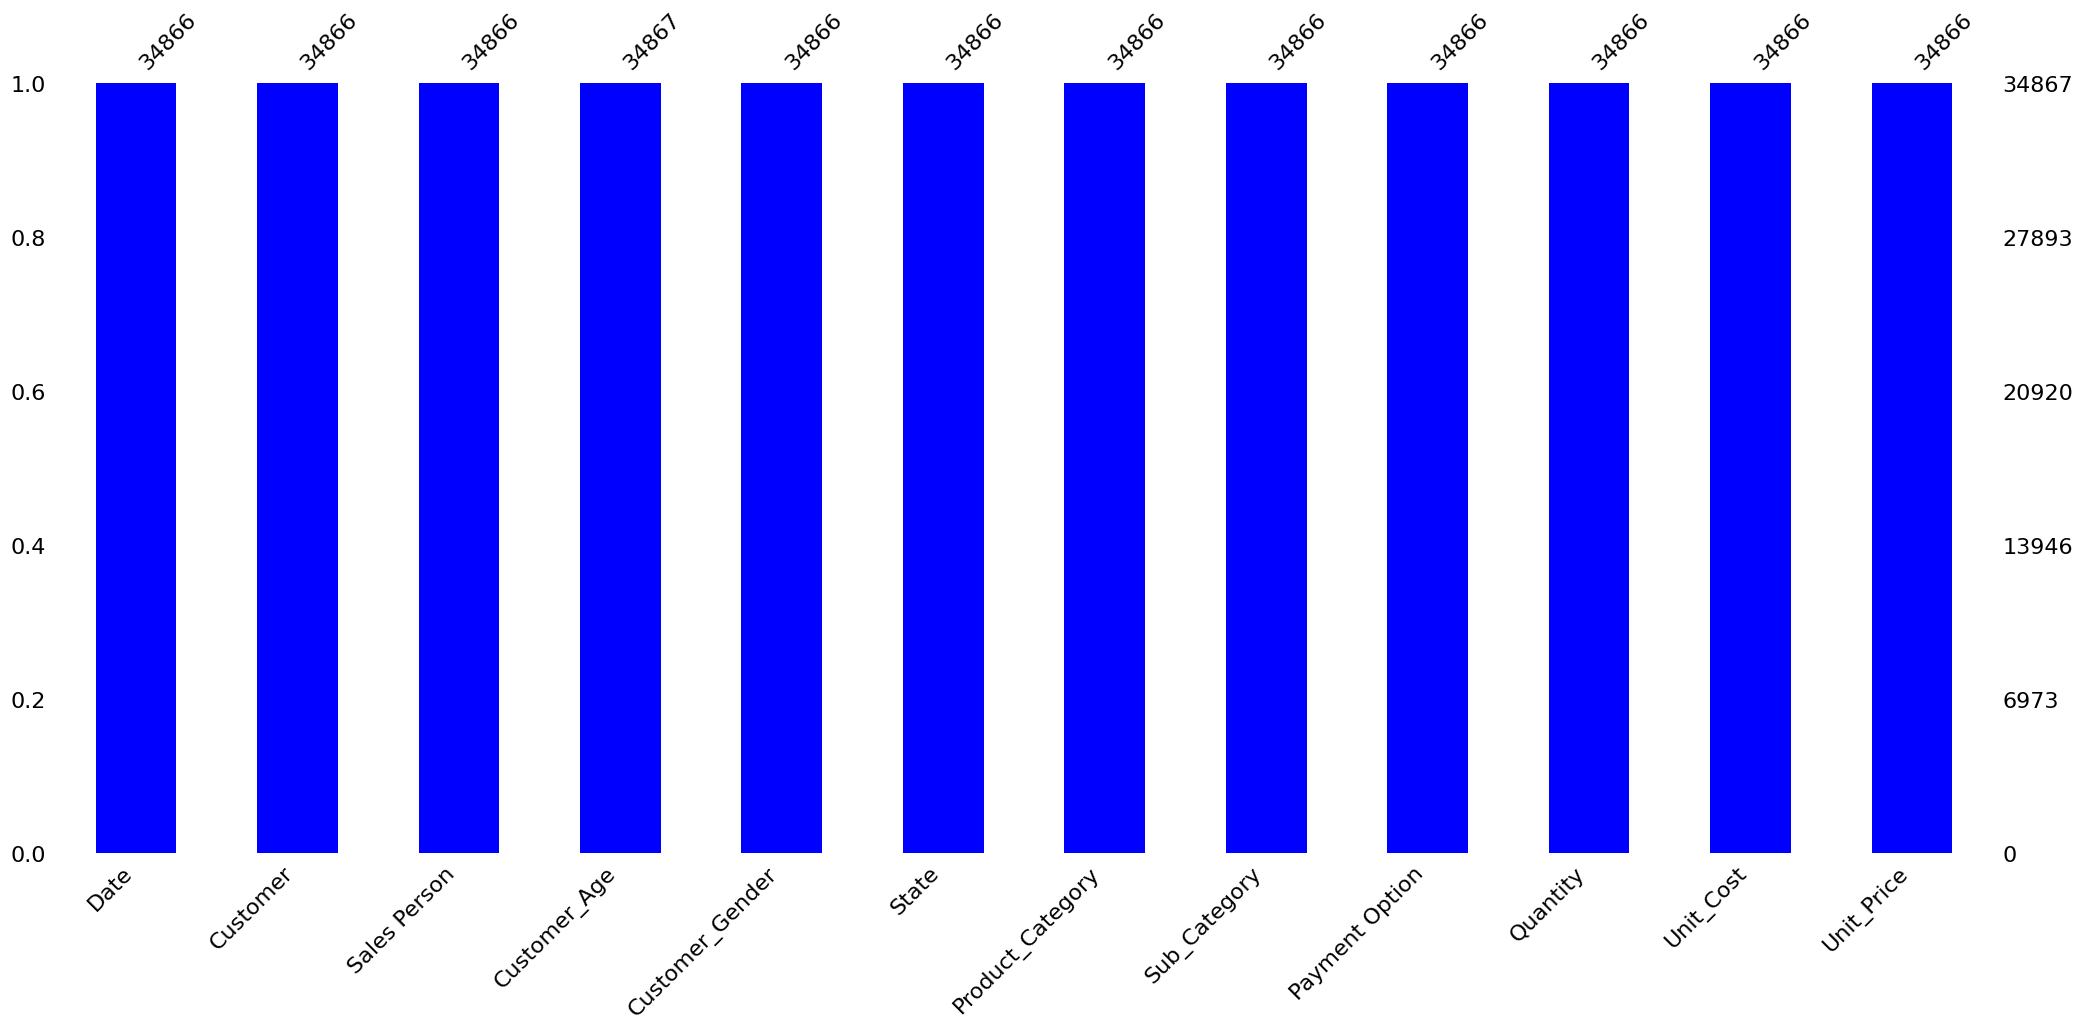

In [14]:
# Visualize missing data in a bar

msno.bar(df,color="blue");

In [15]:
# Display where we have missing data in the data

# First step - run the code below to see big picture of where data is null denoted as True

df.isnull()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
34862,False,False,False,False,False,False,False,False,False,False,False,False
34863,False,False,False,False,False,False,False,False,False,False,False,False
34864,False,False,False,False,False,False,False,False,False,False,False,False
34865,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
# Second step - filter the data to show only rows that contain at least one missing values

df[df.isnull().any(axis=1)]

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Drop the missing data

df.dropna(inplace=True)   # remove rows with missing data, inplace=True, modifies original data instead of returning new copy.

In [18]:
# Check if data has been dropped

df.isnull().sum()

Date                0
Customer            0
Sales Person        0
Customer_Age        0
Customer_Gender     0
State               0
Product_Category    0
Sub_Category        0
Payment Option      0
Quantity            0
Unit_Cost           0
Unit_Price          0
dtype: int64

In [19]:
# Datatime Analysis

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5


In [20]:
# Convert the date column into a pandas datetime object i.e. from object to datetime format

df["Date"]= pd.to_datetime(df["Date"])

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34866 entries, 0 to 34865
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Customer          34866 non-null  object        
 2   Sales Person      34866 non-null  object        
 3   Customer_Age      34866 non-null  int64         
 4   Customer_Gender   34866 non-null  object        
 5   State             34866 non-null  object        
 6   Product_Category  34866 non-null  object        
 7   Sub_Category      34866 non-null  object        
 8   Payment Option    34866 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit_Cost         34866 non-null  float64       
 11  Unit_Price        34866 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 3.5+ MB


In [21]:
# Extract the year, month, quarter

df['year'] = df["Date"].dt.year
df['month'] = df["Date"].dt.month
df['month_name'] = df["Date"].dt.month_name()
df['quarter'] = df["Date"].dt.quarter


df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1


In [22]:
# Group customer age

def age_group(x):
    if x <= 25:
        return "<= 25 Young Adult"
    elif x <= 40:
        return "25-40 Adult"
    elif x <= 50:
        return "41-50 Old Adult"
    else:
        return ">= 51 Elders"


# Apply function to the data
df["age_group"] =  df["Customer_Age"].apply(age_group)

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,age_group
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1,25-40 Adult
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1,25-40 Adult


In [23]:
# Cost, Revenue and Profit Calculations

df["cost"]= df["Quantity"]*df["Unit_Cost"]
df["revenue"]= df["Quantity"]*df["Unit_Price"]
df["profit"]= df["revenue"] - df["cost"]

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,age_group,cost,revenue,profit
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1,25-40 Adult,80.0,109.0,29.0
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1,25-40 Adult,49.0,57.0,8.0


In [24]:
# Profit/Loss Grouping

def porl(x):
    if x >= 0:
        return "Profit"
    else:
        return "Loss"

df["profit_label"] = df["profit"].apply(porl)

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,age_group,cost,revenue,profit,profit_label
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,109.0,2016,2,February,1,25-40 Adult,80.0,109.0,29.0,Profit
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,28.5,2016,2,February,1,25-40 Adult,49.0,57.0,8.0,Profit


# Univariate Analysis


### Categorical Data Visualization

In [25]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'cost', 'revenue', 'profit', 'profit_label'],
      dtype='object')

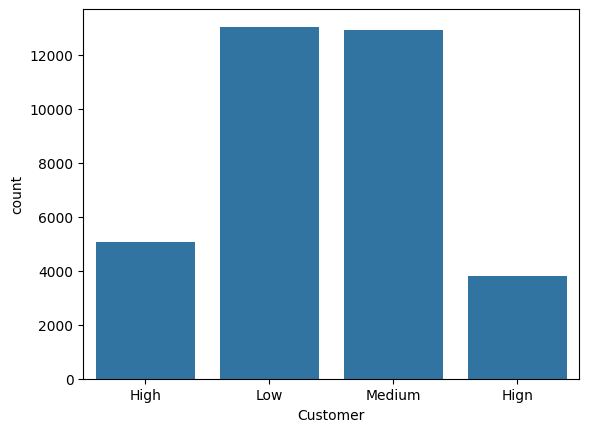

In [26]:
# How many customers belong to each customer specification

sns.countplot(x="Customer", data=df);

In [27]:
# Investigate the columns affected wrong classification seen form the visual above

df[df["Customer"]== "Hign"].head(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,age_group,cost,revenue,profit,profit_label
29770,2015-08-03,Hign,Derick,28,F,Lagos,Phones,IPhone,Cash,1.0,...,2136.00,2015,8,August,3,25-40 Adult,2295.00,2136.00,-159.0,Loss
29771,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,2.0,...,19.50,2015,8,August,3,25-40 Adult,35.00,39.00,4.0,Profit
29772,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,3.0,...,18.67,2015,8,August,3,25-40 Adult,50.01,56.01,6.0,Profit


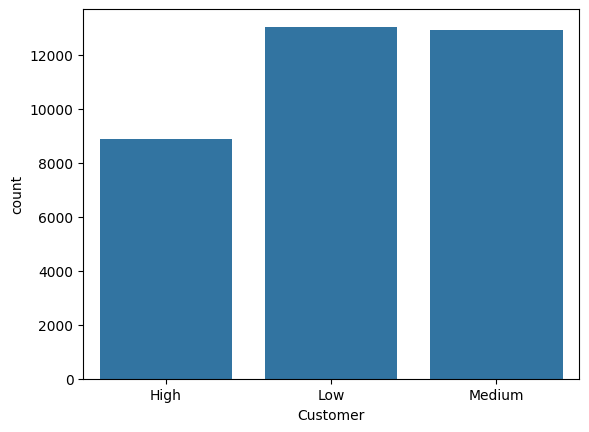

In [28]:
# Correct the spelling of HIGN

df.loc[df["Customer"]== "Hign", "Customer"] = "High"

sns.countplot(x="Customer", data=df);

In [29]:
df["Customer"].value_counts()

Low       13041
Medium    12926
High       8899
Name: Customer, dtype: int64

## Observation

- Low and Medium tier customers constitute ~74% of transactions, while High-tier customers are fewer.
- Focus on retaining existing Low/ Medium customers and upselling them could boost volume, while premium High-tier shoppers (though fewer) might yield higher margins per sale.


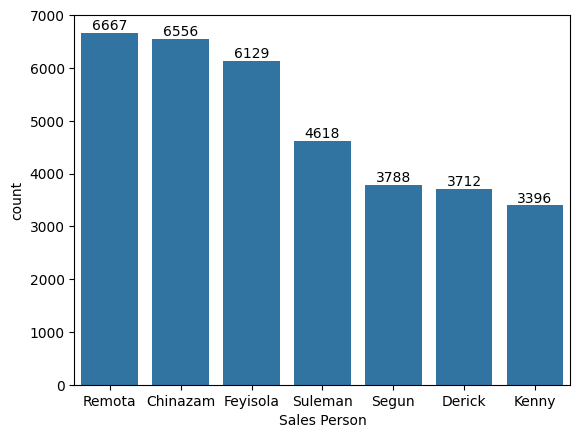

In [31]:
# To label our chat

ax = sns.countplot(x=df["Sales Person"], order=df["Sales Person"].value_counts(ascending=False).index)
values= df["Sales Person"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],labels=values);


## Observations

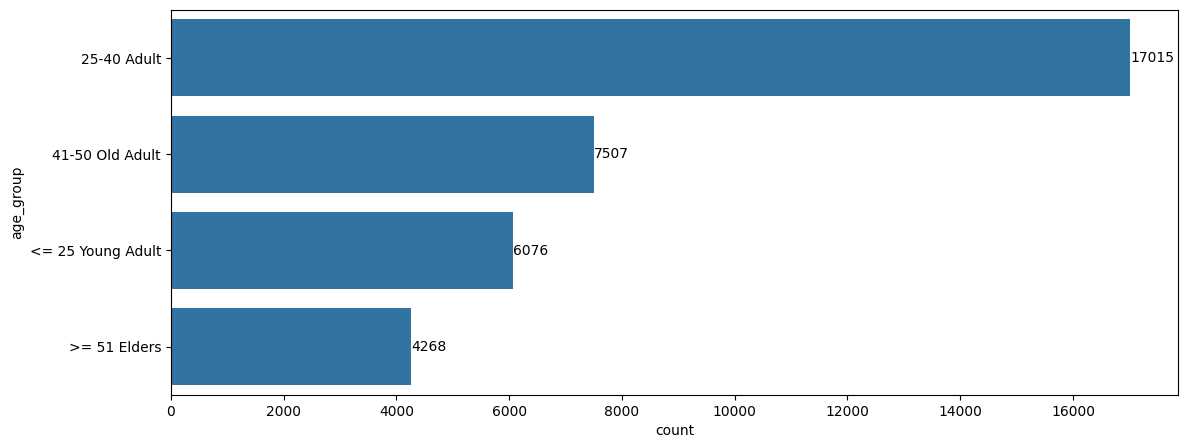

In [35]:
# Total transactions by customer age group
plt.figure(figsize=(13,5))
ax = sns.countplot(y=df["age_group"], order=df["age_group"].value_counts(ascending=False).index)
values= df["age_group"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],labels=values);


## Observations

Age distribution skews to prime working age (25–40), almost half of the working population falls in this category

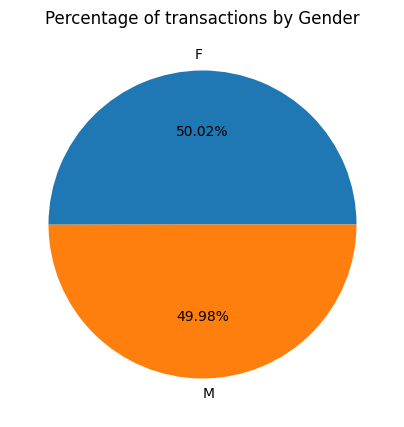

In [36]:
# Total transaction by Customer Gender

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df["Customer_Gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of transactions by Gender")
plt.show();

## Observations

Gender split is nearly 50/50.

Lagos        10332
Abuja         6421
Abia          5206
Adamawa       2446
Akwa Ibom     1287
Edo           1229
Anambra       1171
Bauchi        1112
Bayelsa       1092
Benue          869
Name: State, dtype: int64


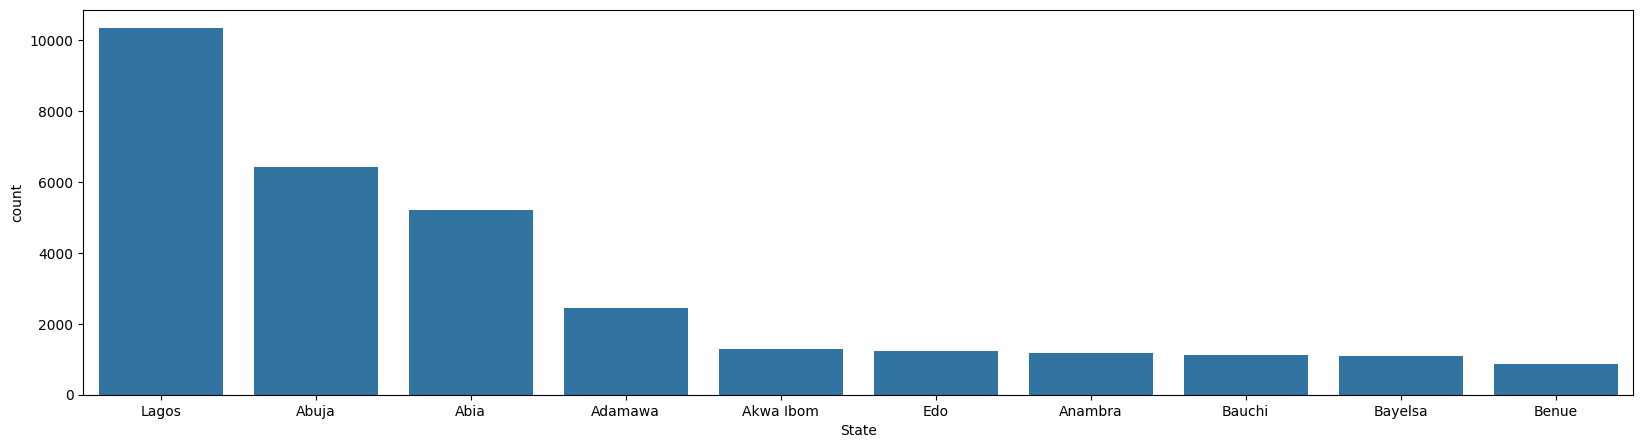

In [37]:
# Top 10 transactions by state

plt.figure(figsize=(20,5))
topten=df["State"].value_counts().head(10)
sns.countplot(x="State", data=df, order=topten.index);
print(topten)

## Observations

- Sales are heavily concentrated in a few states: Lagos, Abuja, and Abia together account for over half of transactions. Other regions contribute less.
- Implication: Marketing and logistic resources might be focused on top-performing states first. New campaigns in under-performing states could be launched carefully, given their smaller sales base.

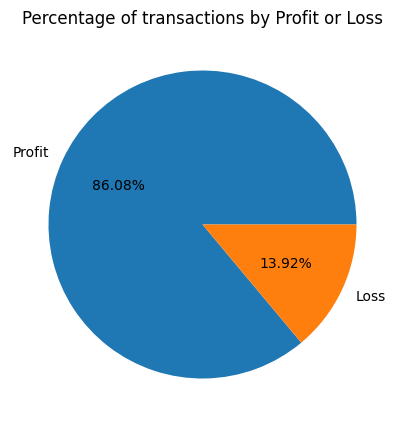

In [38]:
# Total transaction by Profit or Loss

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df["profit_label"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of transactions by Profit or Loss")
plt.show();

### Numerical Data Visualization

In [39]:
# Quantity, Cost, Revenue and Profit

Text(0.5, 1.0, 'Histogram on Profit')

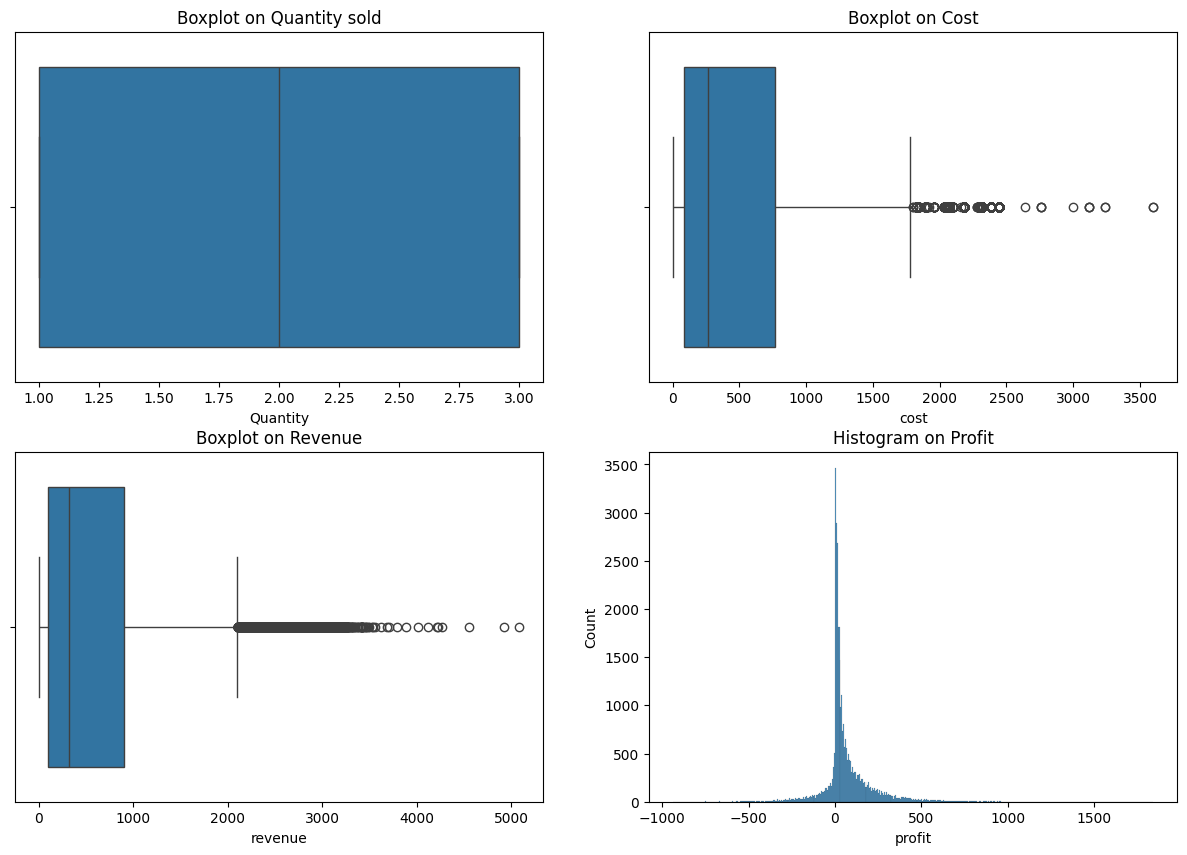

In [40]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.boxplot(x="Quantity", data=df, ax=axs[0,0])
axs[0,0].set_title("Boxplot on Quantity sold")

sns.boxplot(x="cost", data=df, ax=axs[0,1])
axs[0,1].set_title("Boxplot on Cost")

sns.boxplot(x="revenue", data=df, ax=axs[1,0])
axs[1,0].set_title("Boxplot on Revenue")

sns.histplot(x="profit", data=df, ax=axs[1,1])
axs[1,1].set_title("Histogram on Profit")

# Bivariate Analysis

In [41]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'cost', 'revenue', 'profit', 'profit_label'],
      dtype='object')

In [42]:
# Categorical Bivariate Analysis
# Customer, sales person, age group, product category, payment option, sub-category by Profit

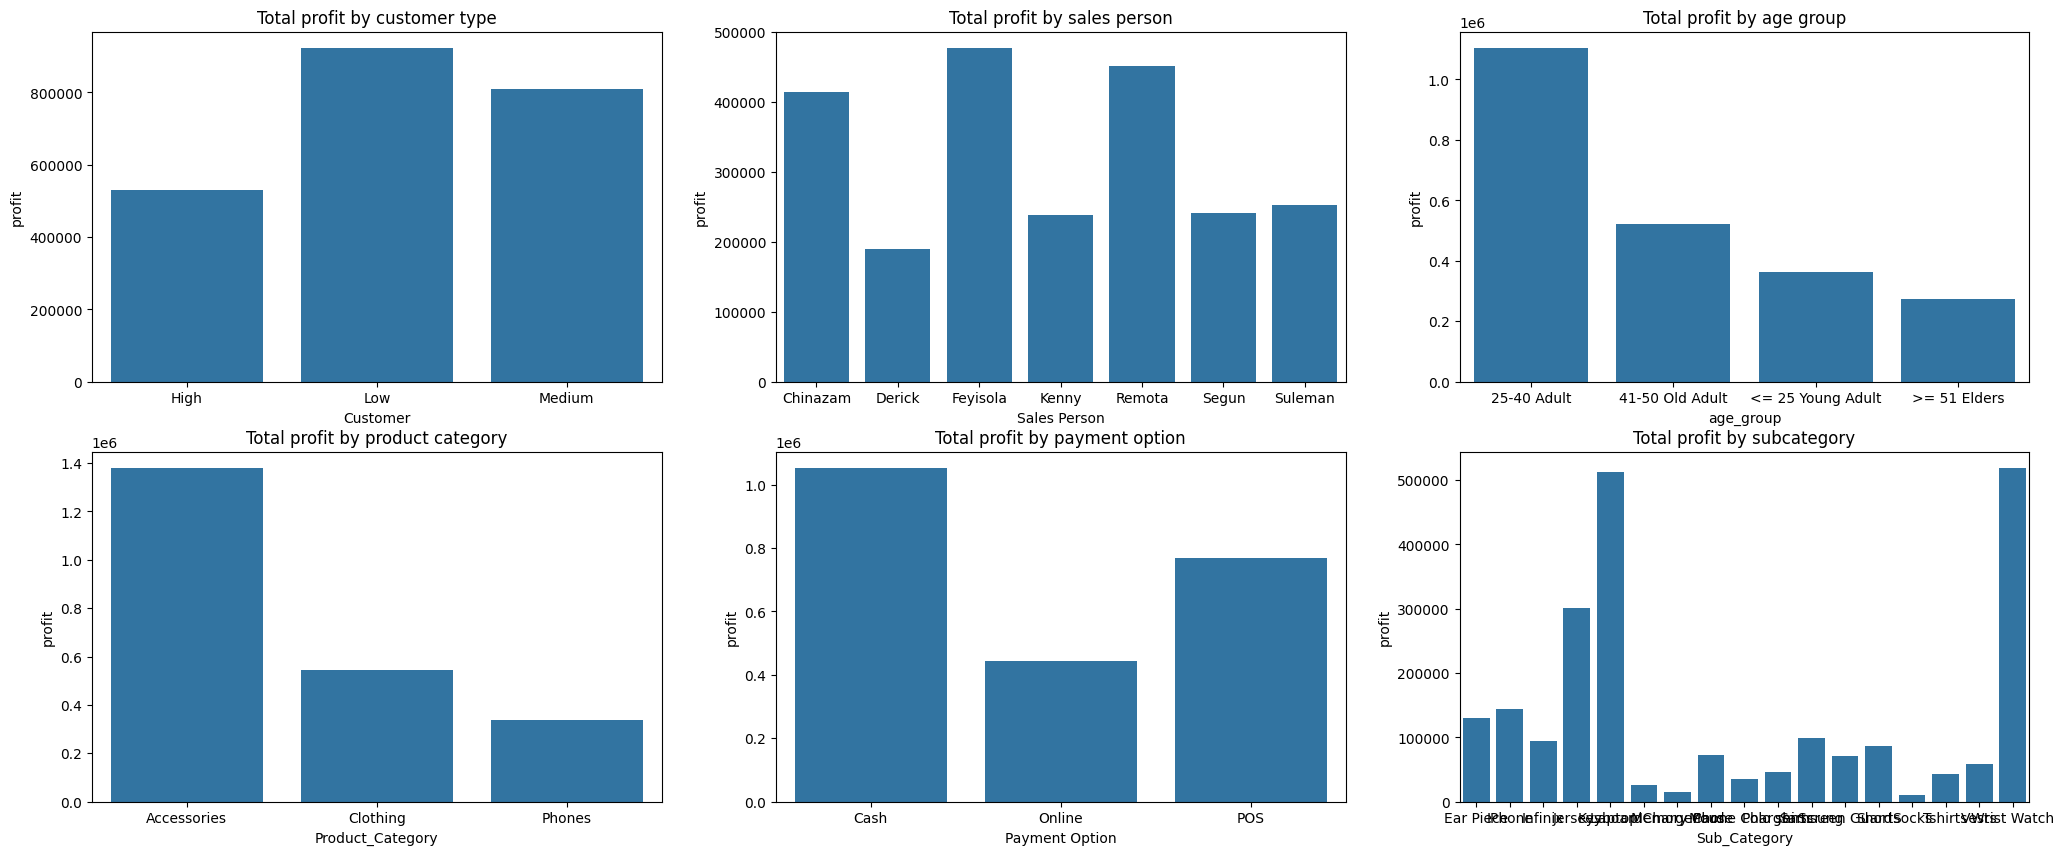

In [43]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(25,10))

cust_prof = df.groupby("Customer")["profit"].sum().reset_index()
sns.barplot(x="Customer", data=cust_prof, y="profit", ax=axs[0,0])
axs[0,0].set_title("Total profit by customer type")

sp_prof = df.groupby("Sales Person")["profit"].sum().reset_index()
sns.barplot(x="Sales Person", data=sp_prof, y="profit", ax=axs[0,1])
axs[0,1].set_title("Total profit by sales person")

ag_prof = df.groupby("age_group")["profit"].sum().reset_index()
sns.barplot(x="age_group", data=ag_prof, y="profit", ax=axs[0,2])
axs[0,2].set_title("Total profit by age group")

pc_prof = df.groupby("Product_Category")["profit"].sum().reset_index()
sns.barplot(x="Product_Category", data=pc_prof, y="profit", ax=axs[1,0])
axs[1,0].set_title("Total profit by product category")

po_prof = df.groupby("Payment Option")["profit"].sum().reset_index()
sns.barplot(x="Payment Option", data=po_prof, y="profit", ax=axs[1,1])
axs[1,1].set_title("Total profit by payment option")

sc_prof = df.groupby("Sub_Category")["profit"].sum().reset_index()
sns.barplot(x="Sub_Category", data=sc_prof, y="profit", ax=axs[1,2])
axs[1,2].set_title("Total profit by subcategory");




In [60]:
# Numerical bivariate analysis

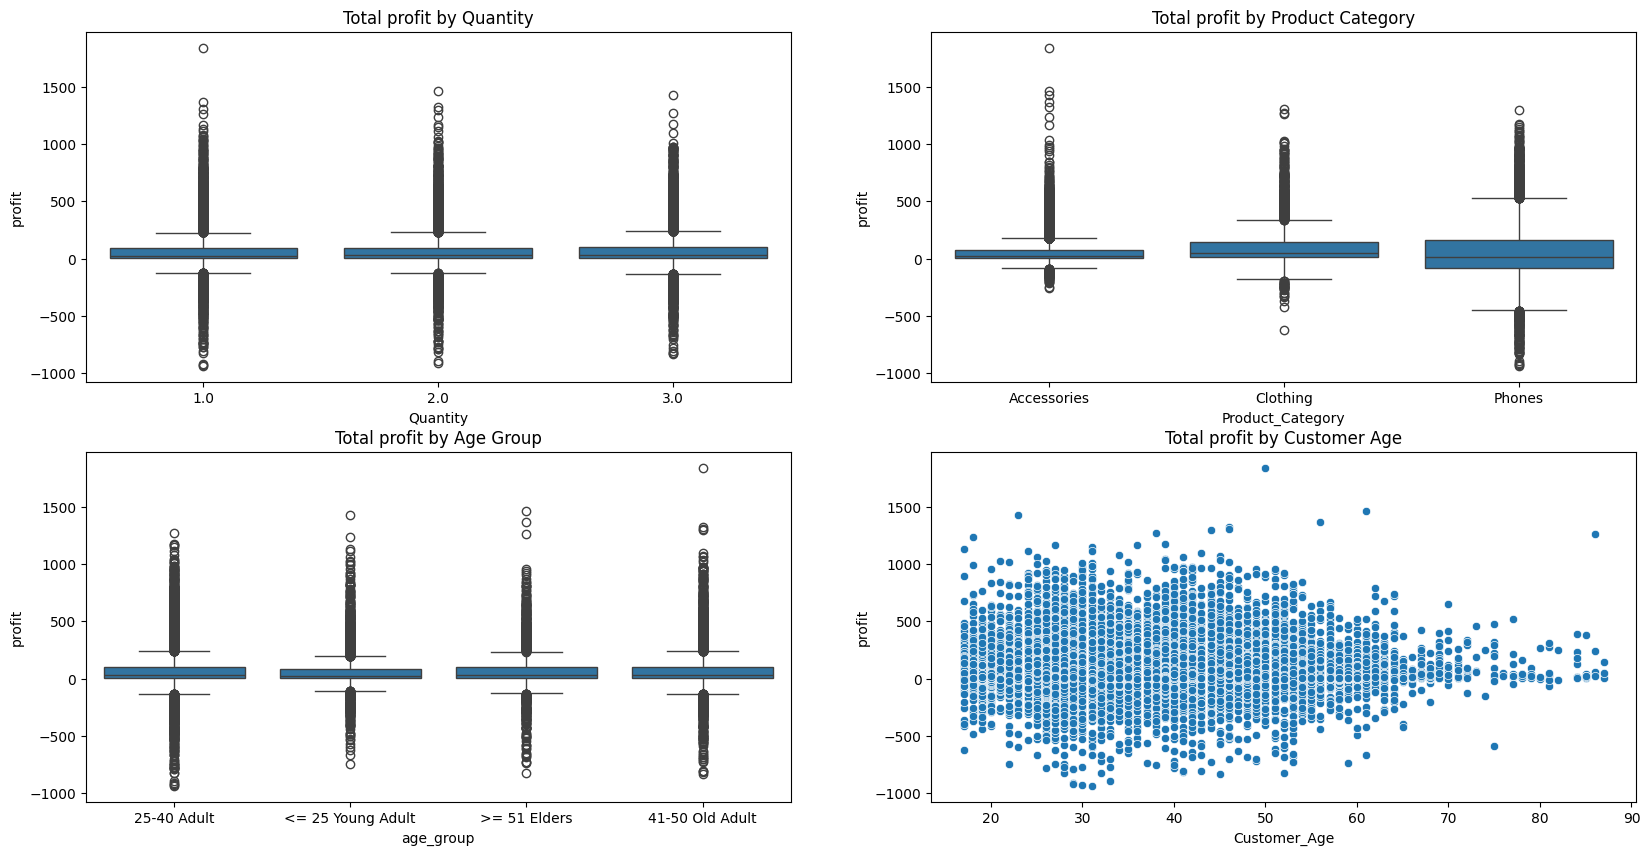

In [45]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

sns.boxplot(x="Quantity", y="profit", data=df, ax=axs[0,0])
axs[0,0].set_title("Total profit by Quantity")

sns.boxplot(x="Product_Category", y="profit", data=df, ax=axs[0,1])
axs[0,1].set_title("Total profit by Product Category")

sns.boxplot(x="age_group", y="profit", data=df, ax=axs[1,0])
axs[1,0].set_title("Total profit by Age Group")

sns.scatterplot(x="Customer_Age", y="profit", data=df, ax=axs[1,1])
axs[1,1].set_title("Total profit by Customer Age");


In [47]:
# Product Category against cost, revenue and profit

procat = df.groupby("Product_Category")[["cost", "revenue", "profit"]].sum().reset_index()

procat

,Product_Category,cost,revenue,profit
0,Accessories,6041896.06,7420663.12,1378767.06
1,Clothing,2892324.94,3437556.95,545232.01
2,Phones,11148745.02,11486354.63,337609.61


In [48]:
# To transpose the data above

procat = pd.melt(procat, id_vars="Product_Category", var_name="Metric", value_name="Total")

procat

,Product_Category,Metric,Total
0,Accessories,cost,6041896.06
1,Clothing,cost,2892324.94
2,Phones,cost,11148745.02
3,Accessories,revenue,7420663.12
4,Clothing,revenue,3437556.95
5,Phones,revenue,11486354.63
6,Accessories,profit,1378767.06
7,Clothing,profit,545232.01
8,Phones,profit,337609.61


<Axes: xlabel='Product_Category', ylabel='Total'>

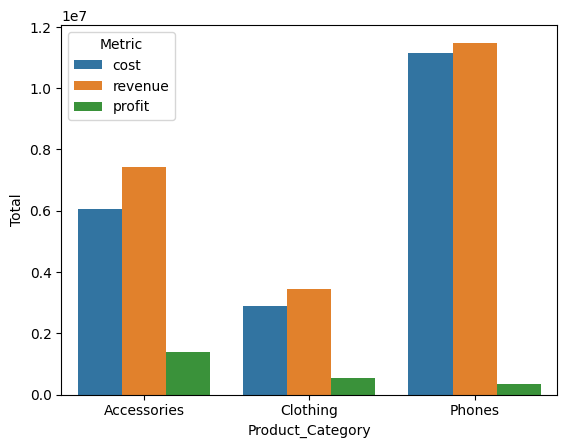

In [49]:
# Visualization

sns.barplot(data=procat, x="Product_Category", y="Total", hue="Metric")   # hue = legend

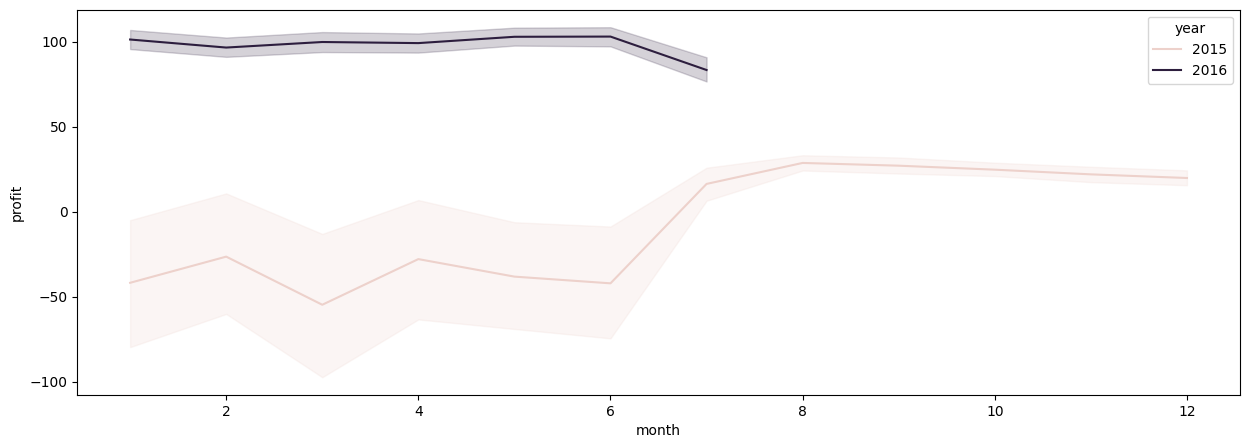

In [50]:
plt.figure(figsize=(15,5))
sns.lineplot(x='month', y='profit', data=df, hue='year');

In [51]:
# Using Pivot table

df.pivot_table(values='profit', index='year', columns='month', aggfunc='sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,-5778.70,-4079.65,-8163.79,-4945.69,-7801.45,-8690.61,15104.47,65926.24,62172.33,62950.66,54480.9,67448.12
2016,280204.25,263640.18,299777.67,307746.51,356915.59,357549.86,107151.79,NaN,NaN,NaN,NaN,NaN


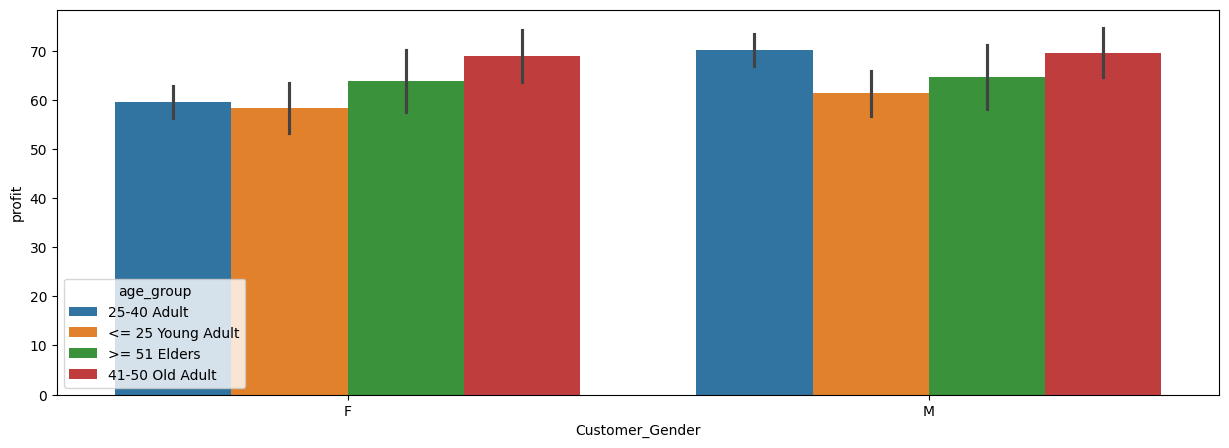

In [52]:
# Customer Gender, Age Group and Profit

plt.figure(figsize=(15,5))
sns.barplot(x="Customer_Gender", y='profit', data=df, hue="age_group");


In [53]:
# Correlation

# 1. Extract the numerical data

numerical_df = df.select_dtypes(exclude=["object","datetime"])

numerical_df.head(2)

,Customer_Age,Quantity,Unit_Cost,Unit_Price,year,month,quarter,cost,revenue,profit
0,29,1.0,80.0,109.0,2016,2,1,80.0,109.0,29.0
1,29,2.0,24.5,28.5,2016,2,1,49.0,57.0,8.0


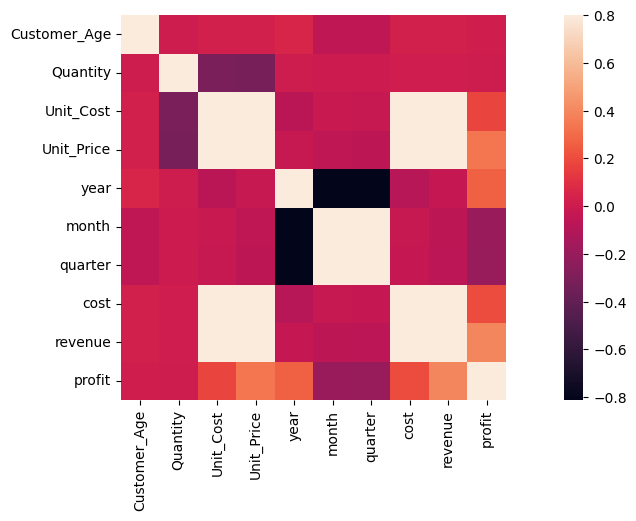

In [54]:
# 2. Draw heatmap

a = numerical_df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(a,vmax=.8, square=True);

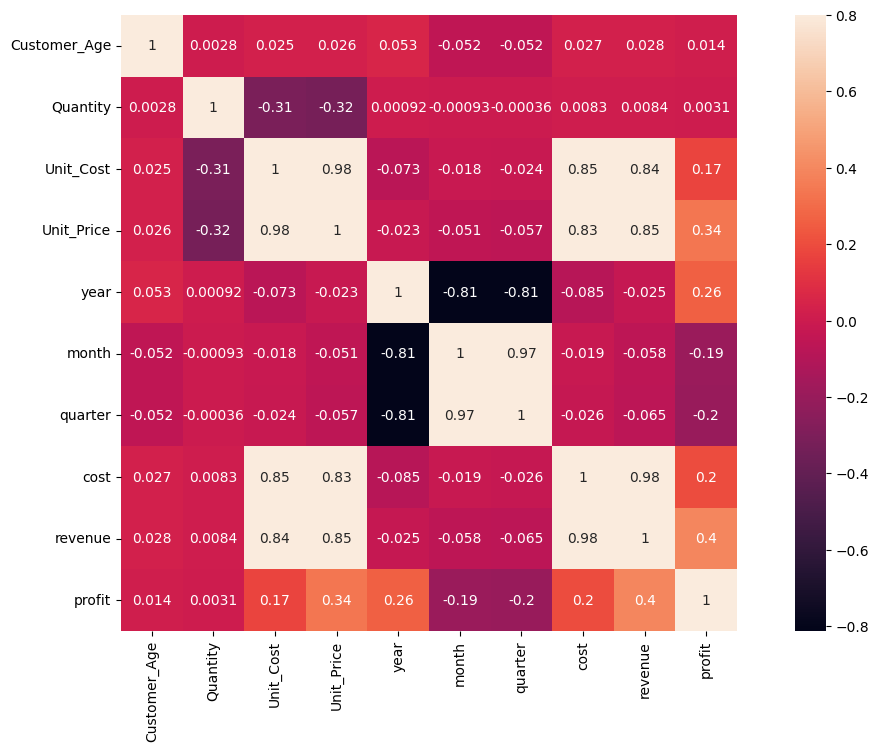

In [55]:
# Include number (annot) for easy analysis

a = numerical_df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(a,vmax=.8, square=True, annot=True);

C:\Users\Oladayo\anaconda3\envs\pycaret-env\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


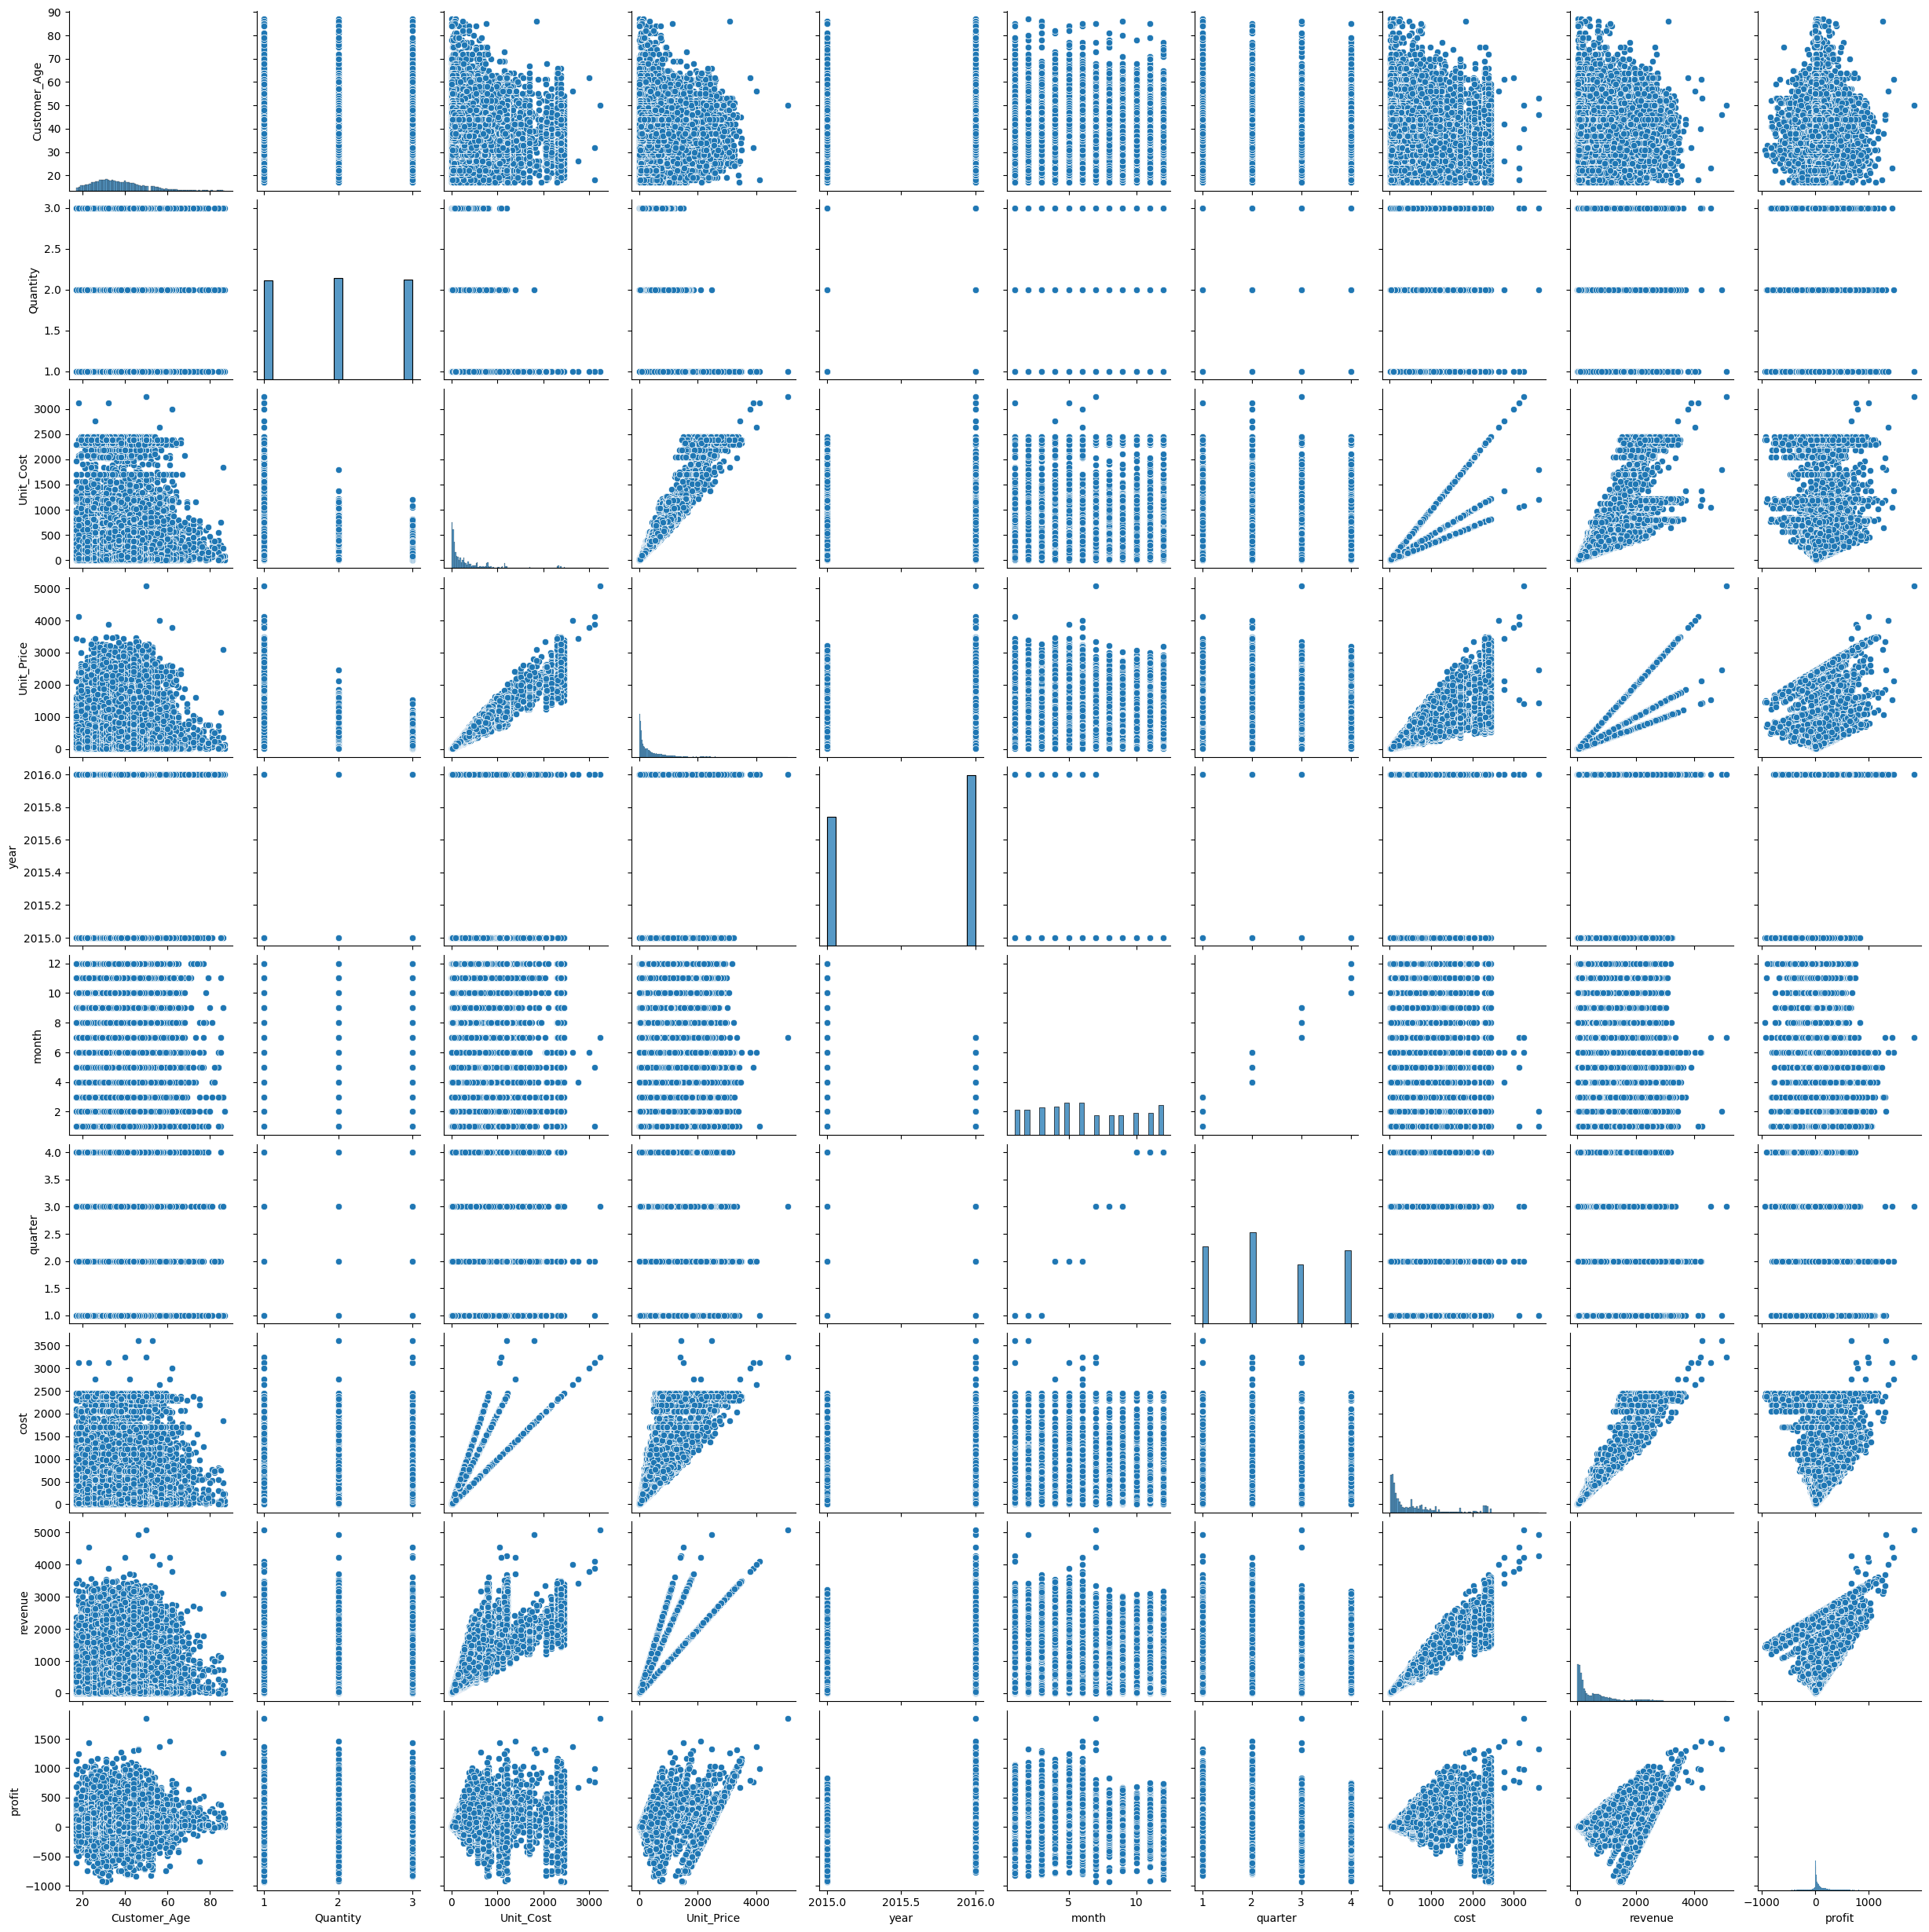

In [57]:
# Display all scatterplots showing the relationships between all pairs of variables in a dataset

sns.pairplot(df, size=2.5);